## Loading packages

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

import cell2location
import scvi

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

import sctk

Global seed set to 0


In [2]:
results_folder = '/nfs/team205/heart/cell2location'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'

## Read in data

In [3]:
scRNA_path='/nfs/team205/heart/anndata_objects/8regions/RNA_adult-8reg_full_raw_cellstate-annotated.h5ad'

celltype_key='cell_state'

## Loading scRNA-seq reference data

In [4]:
# Read scRNA data
adata_ref = sc.read(scRNA_path)

# Remove 'unclassified' cells
adata_ref = adata_ref[adata_ref.obs[celltype_key]!='unclassified']

# Make sure .var_names are ENSEMBL IDs
adata_ref.var

,gene_name-new,gene_name_scRNA-0-original,gene_name_snRNA-1-original,gene_name_multiome-2-original
ENSG00000243485,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG
ENSG00000237613,FAM138A,FAM138A,FAM138A,FAM138A
ENSG00000186092,OR4F5,OR4F5,OR4F5,OR4F5
ENSG00000238009,AL627309.1,AL627309.1,AL627309.1,AL627309.1
ENSG00000239945,AL627309.3,AL627309.3,AL627309.3,AL627309.3
...,...,...,...,...
ENSG00000277856,AC233755.2,AC233755.2,AC233755.2,AC233755.2
ENSG00000275063,AC233755.1,AC233755.1,AC233755.1,AC233755.1
ENSG00000271254,AC240274.1,AC240274.1,AC240274.1,AC240274.1
ENSG00000277475,AC213203.2,AC213203.1,AC213203.1,AC213203.2


In [5]:
adata_ref.obs[celltype_key].value_counts()

vCM1                97830
PC1_vent            55053
FB1                 38709
vCM2                34692
FB2                 32227
EC1_cap             31906
vCM4                28724
vCM3_stressed       26921
FB4_activated       26814
EC5_art             26558
FB3                 22904
EC3_cap             18443
aCM1                18269
PC2_atria           16316
EC2_cap             15166
SMC1_basic          15137
LYVE1+TIMD4+MP      14946
aCM2                14452
LYVE1+IGF1+MP       14178
EC6_ven             13193
PC3_str             12147
FB5                 11205
EC7_endocardial     10535
EC4_immune           8767
aCM4                 6729
NK_CD16hi            5793
EC10_CMC-like        5793
aCM3                 5701
MoMP                 5579
NC1_glial            5517
CD16+Mo              4444
SMC2_art             4220
FB6                  4074
CD14+Mo              4032
Adip1                3891
CD4+T_naive          3074
CD8+T_te             2615
CD8+T_trans          2515
CD4+T_act   

## Prepare ref data

In [6]:
ax = adata_ref[adata_ref.obs['region']=='AX']

## Run per region: Estimation of reference cell type signatures (NB regression)

FB1                 2000
EC3_cap             2000
vCM1                2000
FB4_activated       2000
SMC1_basic          2000
EC6_ven             2000
EC5_art             2000
EC4_immune          2000
PC1_vent            2000
EC2_cap             2000
vCM4                2000
vCM2                2000
vCM3_stressed       2000
EC1_cap             2000
LYVE1+IGF1+MP       2000
PC3_str             1878
FB5                 1659
FB3                 1437
PC2_atria           1316
NK_CD16hi           1046
FB2                  993
LYVE1+TIMD4+MP       945
SMC2_art             685
Adip1                617
CD16+Mo              531
MoMP                 510
CD14+Mo              492
NC1_glial            395
FB6                  374
EC7_endocardial      359
CD8+T_te             352
CD4+T_naive          342
Mast                 273
CD8+T_trans          262
CD8+T_cytox          257
NK_CD56hi            238
EC8_ln               236
CD4+T_act            234
EC10_CMC-like        222
LYVE1+MP_cycling     184


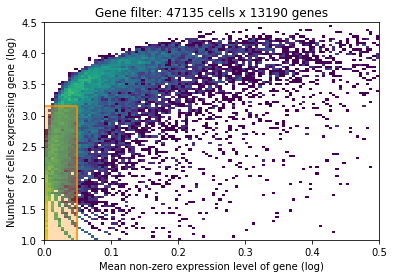

INFO     Using batches from adata.obs["batch_key"]                                           
INFO     Using labels from adata.obs["cell_state"]                                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.


INFO     Successfully registered anndata object containing 47135 cells, 13190 vars, 22       
         batches, 61 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.


Anndata setup with scvi-tools version 0.14.4.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 47135 │
│             Vars             │ 13190 │
│            Labels            │  61   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   0   │
└──────────────────────────────┴───────┘

             SCVI Data Registry              
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │          adata.X          │
│ batch_indices │ adata.obs['_scvi_batch']  │
│    labels     │ adata.obs['_scvi_labels'] │
└───────────────┴───────────────────────────┘

                          Label Categories                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃    Categories    ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_state'] │  Purkinje_cell   │          0          │
│                         │       vCM1       │          1          │
│                         │       vCM2       │          2          │
│                         │  vCM3_stressed   │          3          │
│                         │       vCM4       │          4          │
│                         │       vCM5       │          5          │
│                         │     EC1_cap      │          6          │
│                         │     EC2_cap      │          7          │
│                         │     EC3_cap      │          8          │
│                         │    EC4_immune    │          9          │
│                         │     EC5_art      │         10          │
│                         │     EC6_ven      │         11          │
│                         │ EC7_endocardial  │         12          │
│                         │      EC8_ln      │         13          │
│                         │   EC9_FB-like    │         14          │
│                         │  EC10_CMC-like   │         15          │
│                         │     PC1_vent     │         16          │
│                         │    PC2_atria     │         17          │
│                         │     PC3_str      │         18          │
│                         │   PC4_CMC-like   │         19          │
│                         │    SMC1_basic    │         20          │
│                         │     SMC2_art     │         21          │
│                         │       FB1        │         22          │
│                         │       FB2        │         23          │
│                         │       FB3        │         24          │
│                         │  FB4_activated   │         25          │
│                         │       FB5        │         26          │
│                         │       FB6        │         27          │
│                         │       Meso       │         28          │
│                         │      Adip1       │         29          │
│                         │      Adip2       │         30          │
│                         │      Adip3       │         31          │
│                         │      Adip4       │         32          │
│                         │    NC1_glial     │         33          │
│                         │  NC2_glial_NGF+  │         34          │
│                         │   CD4+T_naive    │         35          │
│                         │    CD4+T_act     │         36          │
│                         │    CD4+T_Th1     │         37          │
│                         │    CD4+T_Th2     │         38          │
│                         │    CD4+T_Tfh     │         39          │
│                         │    CD4+T_reg     │         40          │
│                         │   CD8+T_cytox    │         41          │
│                         │     CD8+T_em     │         42          │
│                         │     CD8+T_te     │         43          │
│                         │   CD8+T_trans    │         44          │
│                         │    MAIT-like     │         45          │
│                         │    NK_CD16hi     │         46          │
│                         │    NK_CD56hi     │         47          │
│                         │       ILC        │         48          │
│                         │        B         │         49          │
│                         │     B_plasma     │         50          │
│                         │     CD14+Mo      │         51          │
│                         │     CD16+Mo      │         52          │
│                         │       MoMP       │         53          

                            Batch Categories                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃      Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │   D1_Cell_3prime-v2   │          0          │
│                        │  D1_Nuclei_3prime-v2  │          1          │
│                        │  D2_Nuclei_3prime-v2  │          2          │
│                        │   D3_Cell_3prime-v2   │          3          │
│                        │  D3_Nuclei_3prime-v2  │          4          │
│                        │  D4_Nuclei_3prime-v2  │          5          │
│                        │   D5_Cell_3prime-v2   │          6          │
│                        │  D5_Nuclei_3prime-v2  │          7          │
│                        │   D6_Cell_3prime-v2   │          8          │
│                        │   D6_Cell_3prime-v3   │          9          │
│                        │  D6_Nuclei_3prime-v2  │         10          │
│                        │   D7_Cell_3prime-v2   │         11          │
│                        │  D7_Nuclei_3prime-v2  │         12          │
│                        │ D8_Nuclei_Multiome-v1 │         13          │
│                        │  D11_Cell_3prime-v3   │         14          │
│                        │ D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3  │         16          │
│                        │  H3_Nuclei_3prime-v3  │         17          │
│                        │  H4_Nuclei_3prime-v3  │         18          │
│                        │  H5_Nuclei_3prime-v3  │         19          │
│                        │  H6_Nuclei_3prime-v3  │         20          │
│                        │  H7_Nuclei_3prime-v3  │         21          │
└────────────────────────┴───────────────────────┴─────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:99: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping val loop
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sampling global variables, sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:13<00:00, 73.37it/s]


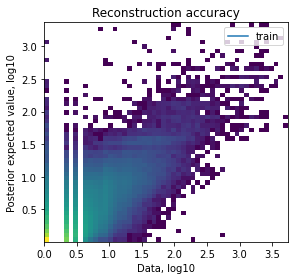

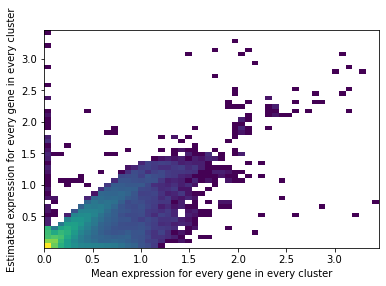

CPU times: user 1h 12min 9s, sys: 3min 29s, total: 1h 15min 39s
Wall time: 43min 15s


In [9]:
%%time
from cell2location.utils.filtering import filter_genes
from cell2location.models import RegressionModel

reg='AX_latest'
adata_sub = ax.copy()

# remove cell_states, which have less than 5 cells
counts = adata_sub.obs[celltype_key].value_counts()
adata_sub = adata_sub[adata_sub.obs[celltype_key].isin(list(counts.keys()[counts>=5]))]
# downsize
adata_sub = sctk.subsample(adata_sub, fraction=1, groupby=celltype_key, min_n=0, max_n=2000)
print(adata_sub.obs['cell_state'].value_counts())

# before we estimate the reference cell type signature we recommend to perform very permissive genes selection
# in this 2D histogram orange rectangle lays over excluded genes.
# In this case, the downloaded dataset was already filtered using this method,
# hence no density under the orange rectangle
selected = filter_genes(adata_sub, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)
# filter the object
adata_sub = adata_sub[:, selected].copy()

# prepare anndata for the regression model
adata_sub=adata_sub.copy()
scvi.data.setup_anndata(adata=adata_sub, 
                        # 10X reaction / sample / batch
                        batch_key='batch_key', 
                        # cell type, covariate used for constructing signatures
                        labels_key=celltype_key, 
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        # categorical_covariate_keys=['Method']
                       )
scvi.data.view_anndata_setup(adata_sub)

# create and train the regression model
mod = RegressionModel(adata_sub) 

# Use all data for training (validation not implemented yet, train_size=1)
mod.train(max_epochs=1000, batch_size=2500, train_size=1, lr=0.002, use_gpu=True)

# plot ELBO loss history during training, removing first 20 epochs from the plot
mod.plot_history(20)

# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_sub = mod.export_posterior(
    adata_sub, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

# Save model
mod.save(f"{ref_run_name}/{reg}", overwrite=True)

# Save anndata object with results
# adata_file = f"{ref_run_name}/{reg}/sc.h5ad"
adata_sub.write(f"{ref_run_name}/{reg}/sc.h5ad")

mod.plot_QC()

# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_sub.varm.keys():
    inf_aver = adata_sub.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}' 
                                    for i in adata_sub.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_sub.var[[f'means_per_cluster_mu_fg_{i}' 
                                    for i in adata_sub.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_sub.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

# save inf_aver
inf_aver.to_csv(f"{ref_run_name}/{reg}/inf_aver.csv")

del adata_sub, mod, inf_aver, counts, selected